In [1]:
# Feature Selection Techniques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load cleaned features and target
X = pd.read_csv("cleaned_features.csv")
y = pd.read_csv("target.csv")

In [3]:
# Chi-Square Test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns)
print("chi square: ")
print(chi2_scores)

chi square: 
Experimentation                       0.063863
Academic_Performance_Decline          0.231941
Social_Isolation                      0.830946
Financial_Issues                      0.029597
Physical_Mental_Health_Problems       0.957191
Legal_Consequences                    0.442576
Relationship_Strain                   0.000013
Risk_Taking_Behavior                  0.007680
Withdrawal_Symptoms                   0.606575
Denial_and_Resistance_to_Treatment    0.132871
dtype: float64


In [4]:
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)
mi_scores = pd.Series(mi_selector.scores_, index=X.columns)
print("mutual infomation: ")
print(mi_scores)

C:\dev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mutual infomation: 
Experimentation                       0.003078
Academic_Performance_Decline          0.000000
Social_Isolation                      0.007009
Financial_Issues                      0.007354
Physical_Mental_Health_Problems       0.001268
Legal_Consequences                    0.000000
Relationship_Strain                   0.003182
Risk_Taking_Behavior                  0.000000
Withdrawal_Symptoms                   0.003924
Denial_and_Resistance_to_Treatment    0.001917
dtype: float64


In [5]:
# Random Forest Importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print("Random forest Importance: ")
print(rf_importances)

C:\dev\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest Importance: 
Experimentation                       0.100361
Academic_Performance_Decline          0.103136
Social_Isolation                      0.094451
Financial_Issues                      0.105478
Physical_Mental_Health_Problems       0.085259
Legal_Consequences                    0.096066
Relationship_Strain                   0.106538
Risk_Taking_Behavior                  0.105759
Withdrawal_Symptoms                   0.099361
Denial_and_Resistance_to_Treatment    0.103591
dtype: float64


In [6]:
# Recursive Feature Elimination (RFE)
lr_model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr_model, n_features_to_select=5)
rfe.fit(X, y)
rfe_selected_features = X.columns[rfe.support_]
print("Recursive Feature Elimination: ")
print(rfe_selected_features)

C:\dev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\dev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Recursive Feature Elimination: 
Index(['Academic_Performance_Decline', 'Social_Isolation',
       'Physical_Mental_Health_Problems', 'Legal_Consequences',
       'Withdrawal_Symptoms'],
      dtype='object')


In [7]:
# Combine scores for comparison
combined_scores = pd.DataFrame({
    "Chi2": chi2_scores,
    "Mutual Info": mi_scores,
    "Random Forest": rf_importances,
    "RFE Selected": X.columns.isin(rfe_selected_features).astype(int)
})
print(combined_scores)

                                        Chi2  Mutual Info  Random Forest  \
Experimentation                     0.063863     0.003078       0.100361   
Academic_Performance_Decline        0.231941     0.000000       0.103136   
Social_Isolation                    0.830946     0.007009       0.094451   
Financial_Issues                    0.029597     0.007354       0.105478   
Physical_Mental_Health_Problems     0.957191     0.001268       0.085259   
Legal_Consequences                  0.442576     0.000000       0.096066   
Relationship_Strain                 0.000013     0.003182       0.106538   
Risk_Taking_Behavior                0.007680     0.000000       0.105759   
Withdrawal_Symptoms                 0.606575     0.003924       0.099361   
Denial_and_Resistance_to_Treatment  0.132871     0.001917       0.103591   

                                    RFE Selected  
Experimentation                                0  
Academic_Performance_Decline                   1  
Social_Iso

In [8]:
# Normalize scores for visualization
normalized_scores = combined_scores.copy()
normalized_scores[["Chi2", "Mutual Info", "Random Forest"]] = \
    normalized_scores[["Chi2", "Mutual Info", "Random Forest"]].apply(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )

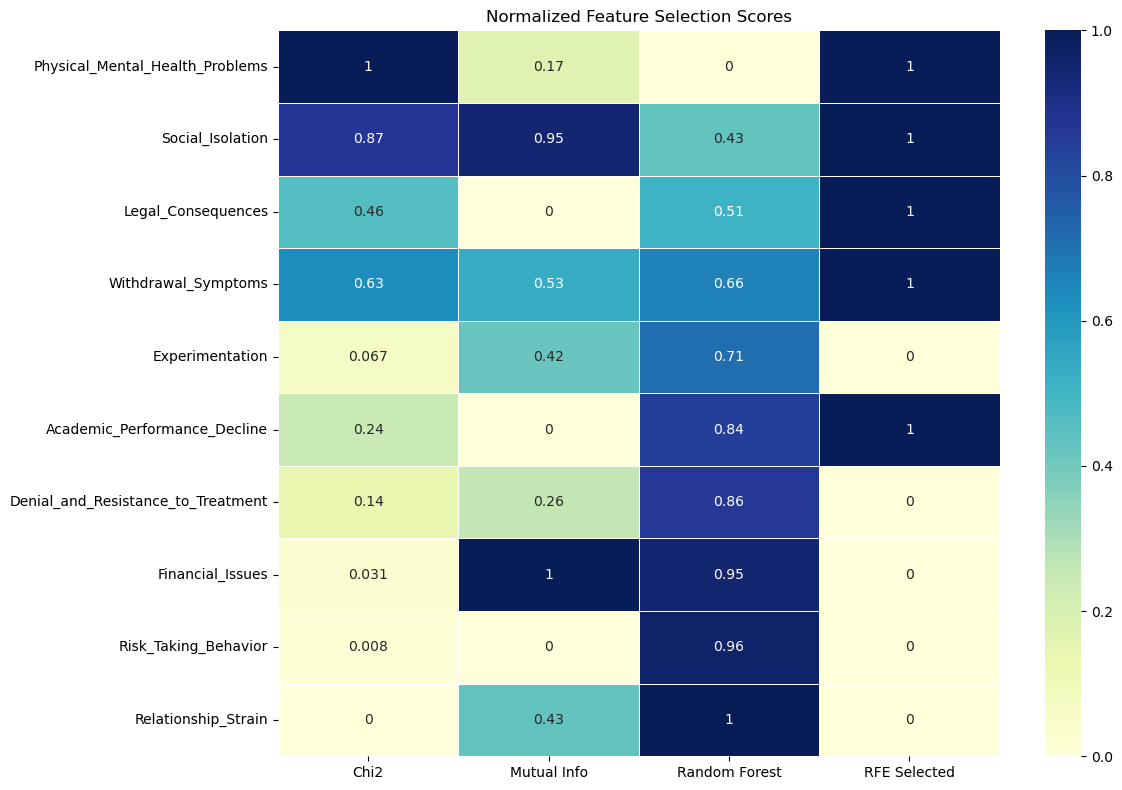

In [9]:
# Plot heatmap
normalized_scores.sort_values("Random Forest", ascending=True, inplace=True)
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_scores, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5)
plt.title("Normalized Feature Selection Scores")
plt.tight_layout()
plt.savefig("feature_selection_heatmap.png", dpi=300)
plt.show()

In [10]:
# Print selected features from RFE
print("Top 5 Features Selected by RFE:")
print(rfe_selected_features.tolist())

Top 5 Features Selected by RFE:
['Academic_Performance_Decline', 'Social_Isolation', 'Physical_Mental_Health_Problems', 'Legal_Consequences', 'Withdrawal_Symptoms']


In [11]:
# Save the selected features for model training
selected_features = X[rfe_selected_features]
selected_features.to_csv("selected_features.csv", index=False)